# Wong - Wang DMF


Kong, X., Kong, R., Orban, C., Wang, P., Zhang, S., Anderson, K., Holmes, A., Murray, J.D., Deco, G., van den Heuvel, M. and Yeo, B.T., 2021. Sensory-motor cortices shape functional connectivity dynamics in the human brain. Nature communications, 12(1), p.6373.


In [ ]:
import os 
import sbi.utils as utils
from copy import deepcopy
from vbi.sbi_inference import Inference
import matplotlib.pyplot as plt
from vbi import report_cfg, update_cfg
from vbi import extract_features_list, extract_features
from vbi import get_features_by_domain, get_features_by_given_names
from vbi.models.pytorch.rww_sde_kong import *

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

In [4]:
# engine = "gpu"  # "cpu"
dtype = torch.float64
path = "output/rww_sde_kong/"
os.makedirs(path, exist_ok=True)

In [5]:
obj = WW_SDE_KONG()
params = obj.get_default_params()
params.keys()

dict_keys(['G', 'J', 'w', 's', 'I0', 'a', 'b', 'd', 'tau_s', 'gamma_s', 't_end', 't_cut', 'tr', 'dt', 'n_sim', 'weights', 'device', 'dtype'])

100%|██████████| 30001/30001 [00:18<00:00, 1665.22it/s]


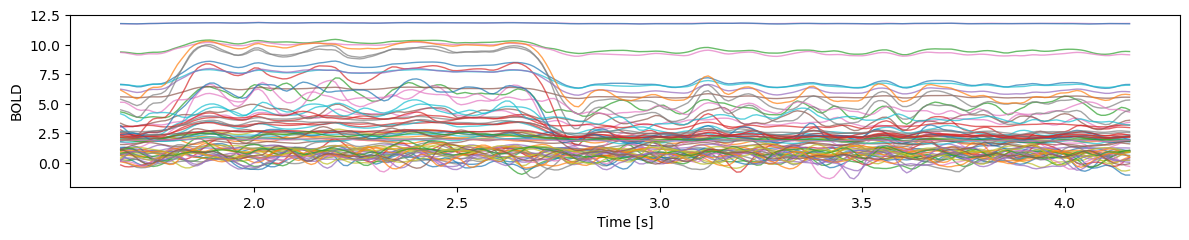

In [6]:
data = obj.run()
t = data["t"]
x = data["x"]

fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))
ax.plot(t, x[:,0,:].T, lw=1, alpha=0.7)
ax.set_xlabel("Time [s]")
ax.set_ylabel("BOLD")
plt.tight_layout()

In [7]:
obj = WW_SDE_KONG()
params = obj.get_default_params()
par = deepcopy(params)
par['G'] = np.linspace(0,7,10)
par['n_sim'] = len(par['G'])
obj = WW_SDE_KONG(par)
data = obj.run()
t = data["t"]
x = data["x"]

print(t.shape, x.shape)

100%|██████████| 30001/30001 [00:19<00:00, 1534.91it/s]

torch.Size([250]) (68, 10, 250)


In [7]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))
# ax.plot(t, x[:,9,:].T, lw=0.5, alpha=0.8)
# ax.set_xlabel("Time [s]")
# ax.set_ylabel("BOLD")
# plt.tight_layout()